# P値関数の概念に至る道筋

* 黒木玄
* 2024-10-10

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#P値関数に至る道を具体例で説明" data-toc-modified-id="P値関数に至る道を具体例で説明-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>P値関数に至る道を具体例で説明</a></span><ul class="toc-item"><li><span><a href="#データの数値「n-=-20-回中-k-=-5-回成功」が得られたときの成功確率-p-について扱いたい." data-toc-modified-id="データの数値「n-=-20-回中-k-=-5-回成功」が得られたときの成功確率-p-について扱いたい.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>データの数値「n = 20 回中 k = 5 回成功」が得られたときの成功確率 p について扱いたい.</a></span></li><li><span><a href="#①固定された有意水準-α-=-0.05-で帰無仮説-p-=-0.5-が棄却されたか否かのみを報告" data-toc-modified-id="①固定された有意水準-α-=-0.05-で帰無仮説-p-=-0.5-が棄却されたか否かのみを報告-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>①固定された有意水準 α = 0.05 で帰無仮説 p = 0.5 が棄却されたか否かのみを報告</a></span></li><li><span><a href="#②帰無仮説-p-=-0.5-のP値を報告" data-toc-modified-id="②帰無仮説-p-=-0.5-のP値を報告-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>②帰無仮説 p = 0.5 のP値を報告</a></span></li><li><span><a href="#③すべての検定仮説-p-=-a-のP値を報告" data-toc-modified-id="③すべての検定仮説-p-=-a-のP値を報告-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>③すべての検定仮説 p = a のP値を報告</a></span></li><li><span><a href="#❷固定された信頼水準-$1-\alpha=95\%$-の信頼区間を報告" data-toc-modified-id="❷固定された信頼水準-$1-\alpha=95\%$-の信頼区間を報告-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>❷固定された信頼水準 $1-\alpha=95\%$ の信頼区間を報告</a></span></li><li><span><a href="#❸すべての信頼水準-$1-\alpha=100(1-\alpha)\%$-の信頼区間全体を報告" data-toc-modified-id="❸すべての信頼水準-$1-\alpha=100(1-\alpha)\%$-の信頼区間全体を報告-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>❸すべての信頼水準 $1-\alpha=100(1-\alpha)\%$ の信頼区間全体を報告</a></span></li><li><span><a href="#③と❸が同等であること" data-toc-modified-id="③と❸が同等であること-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>③と❸が同等であること</a></span></li><li><span><a href="#検定仮説-p=0.5-のP値はP値関数の-p=0.5-での値である." data-toc-modified-id="検定仮説-p=0.5-のP値はP値関数の-p=0.5-での値である.-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>検定仮説 p=0.5 のP値はP値関数の p=0.5 での値である.</a></span></li><li><span><a href="#$95\%$-信頼区間はP値関数のグラフを高さ-$5\%$-で切断する線分になっている." data-toc-modified-id="$95\%$-信頼区間はP値関数のグラフを高さ-$5\%$-で切断する線分になっている.-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>$95\%$ 信頼区間はP値関数のグラフを高さ $5\%$ で切断する線分になっている.</a></span></li><li><span><a href="#$0\%$-信頼区間は点推定値の1点だけで構成された区間になっている" data-toc-modified-id="$0\%$-信頼区間は点推定値の1点だけで構成された区間になっている-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>$0\%$ 信頼区間は点推定値の1点だけで構成された区間になっている</a></span></li><li><span><a href="#データの数値-k=5,-n=20-から得られる検定仮説-p=0.5-のP値と95%信頼区間と点推定値" data-toc-modified-id="データの数値-k=5,-n=20-から得られる検定仮説-p=0.5-のP値と95%信頼区間と点推定値-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>データの数値 k=5, n=20 から得られる検定仮説 p=0.5 のP値と95%信頼区間と点推定値</a></span></li></ul></li><li><span><a href="#平坦事前分布のベイズ統計との比較" data-toc-modified-id="平坦事前分布のベイズ統計との比較-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>平坦事前分布のベイズ統計との比較</a></span><ul class="toc-item"><li><span><a href="#事後分布とP値関数はほぼ同じ使い方をできる." data-toc-modified-id="事後分布とP値関数はほぼ同じ使い方をできる.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>事後分布とP値関数はほぼ同じ使い方をできる.</a></span></li><li><span><a href="#❸すべての信用水準-$1-\alpha$-のベイズ信用区間全体を報告" data-toc-modified-id="❸すべての信用水準-$1-\alpha$-のベイズ信用区間全体を報告-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>❸すべての信用水準 $1-\alpha$ のベイズ信用区間全体を報告</a></span></li><li><span><a href="#③と❸の同等性よりベイズ的なP値関数が得られる." data-toc-modified-id="③と❸の同等性よりベイズ的なP値関数が得られる.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>③と❸の同等性よりベイズ的なP値関数が得られる.</a></span></li><li><span><a href="#スコアP値関数とベイズP値関数の比較" data-toc-modified-id="スコアP値関数とベイズP値関数の比較-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>スコアP値関数とベイズP値関数の比較</a></span></li></ul></li><li><span><a href="#事前分布が偏っている場合での比較" data-toc-modified-id="事前分布が偏っている場合での比較-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>事前分布が偏っている場合での比較</a></span><ul class="toc-item"><li><span><a href="#偏っている事前分布" data-toc-modified-id="偏っている事前分布-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>偏っている事前分布</a></span></li><li><span><a href="#標本サイズが小さい場合" data-toc-modified-id="標本サイズが小さい場合-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>標本サイズが小さい場合</a></span></li><li><span><a href="#標本サイズを大きくした場合" data-toc-modified-id="標本サイズを大きくした場合-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>標本サイズを大きくした場合</a></span></li></ul></li></ul></div>

In [1]:
using Distributions
using Optim
using Roots
using StatsPlots
default(fmt=:png, titlefontsize=12)

safediv(x, y) = x==0 ? zero(x/y) : x/y

function pvalue_score(k, n, p)
    χ² = safediv((k - n*p)^2, n*p*(1-p))
    ccdf(Chisq(1), χ²)
end

function confint_score(k, n, α=0.05)
    α == 0 && return [0.0, 1.0]
    p̂ = k/n
    z = quantile(Normal(), 1-α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

function pvalue_hdi(dist::ContinuousUnivariateDistribution, x₀; xlim = extrema(dist))
    p₀ = pdf(dist, x₀)
    xmode = mode(dist)
    f(x) = pdf(dist, x) - p₀
    if x₀ == xmode
        1.0
    elseif x₀ > xmode
        x₁ = find_zero(f, (xlim[begin], xmode))
        cdf(dist, x₁) + ccdf(dist, x₀)
    else
        x₁ = find_zero(f, (xmode, xlim[end]))
        cdf(dist, x₀) + ccdf(dist, x₁)
    end
end

function pvalue_bayes_hdi(x, n, p; prior=Beta(1, 1))
    κ, λ = params(prior)
    posterior = Beta(κ+k, λ+n-k)
    a, b = params(posterior)
    if a == 1 && b == 1
        1.0
    elseif a ≤ 1
        ccdf(posterior, p)
    elseif b ≤ 1
        cdf(posterior, p)
    else
        pvalue_hdi(posterior, p)
    end
end

function highest_density_interval(dist, α=0.05)
    f(p) = quantile(dist, min(1, p+(1-α))) - quantile(dist, p)
    o = optimize(f, 0, α, Brent())
    p = o.minimizer
    [quantile(dist, p), quantile(dist, min(1, p+(1-α)))]
end

function credint_hdi(k, n, α=0.05; prior=Beta(1, 1))
    κ, λ = params(prior)
    posterior = Beta(κ+k, λ+n-k)
    m = mode(posterior)
    α ≈ 1 && return [m, m]
    highest_density_interval(posterior, α)
end

credint_hdi (generic function with 2 methods)

## P値関数に至る道を具体例で説明

### データの数値「n = 20 回中 k = 5 回成功」が得られたときの成功確率 p について扱いたい.

In [2]:
k, n = 5, 20
@show k n;

k = 5
n = 20


### ①固定された有意水準 α = 0.05 で帰無仮説 p = 0.5 が棄却されたか否かのみを報告

In [3]:
α = 0.05
p = 0.5
@show k n α p
@show pvalue_score(k, n, p) < α;

k = 5
n = 20
α = 0.05
p = 0.5
pvalue_score(k, n, p) < α = true


### ②帰無仮説 p = 0.5 のP値を報告

In [4]:
p = 0.5
@show k n p
@show pvalue_score(k, n, p);

k = 5
n = 20
p = 0.5
pvalue_score(k, n, p) = 0.025347318677468256


### ③すべての検定仮説 p = a のP値を報告

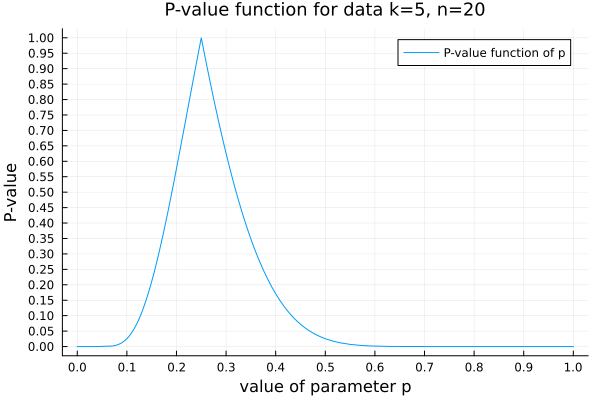

In [5]:
plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function of p")
plot!(xguide="value of parameter p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value function for data k=$k, n=$n")

### ❷固定された信頼水準 $1-\alpha=95\%$ の信頼区間を報告

In [6]:
α = 0.05
@show confint_score(k, n, α);

confint_score(k, n, α) = [0.1118617014076655, 0.46870087761874435]


### ❸すべての信頼水準 $1-\alpha=100(1-\alpha)\%$ の信頼区間全体を報告

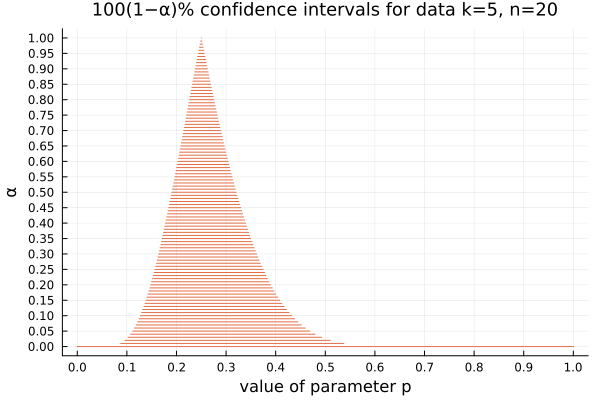

In [7]:
plot()
αs = 0.00:0.01:1
for α in αs
    plot!(confint_score(k, n, α), fill(α, 2); label="", c=2)
end
plot!(xguide="value of parameter p", yguide="α")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("100(1−α)% confidence intervals for data k=$k, n=$n")

### ③と❸が同等であること

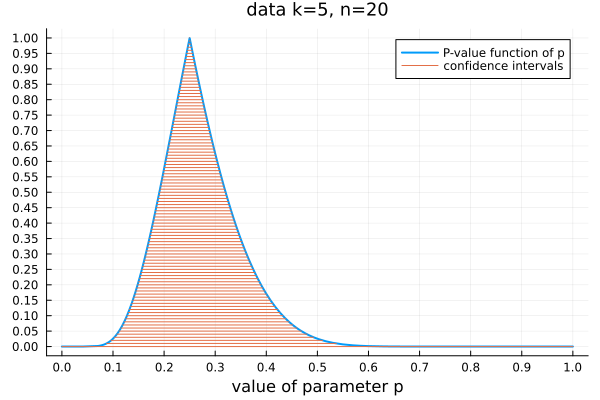

In [8]:
plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function of p", lw=2)
αs = 0.00:0.01:1
l = true
for α in αs
    plot!(confint_score(k, n, α), fill(α, 2); 
        label=(l ? "confidence intervals" : ""), c=2)
    l = false
end
plot!(xguide="value of parameter p", yguide="")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")

以上のように, P値関数(=信頼区間関数)は, 検定仮説達 p=a のP値全体の情報とすべての信頼水準 $1-\alpha$ の信頼区間の情報を全部合わせたものだと考えられる.

### 検定仮説 p=0.5 のP値はP値関数の p=0.5 での値である.

pvalue_score(k, n, 0.5) = 0.025347318677468256


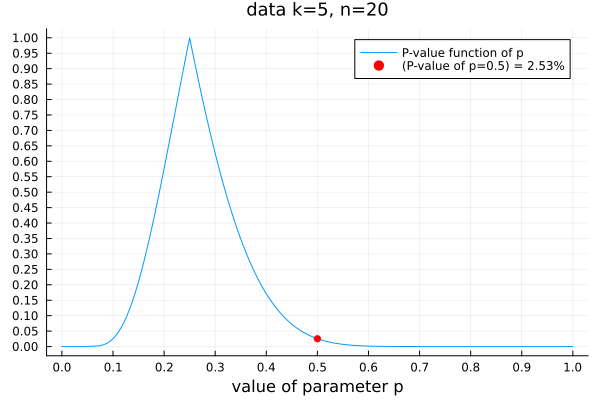

In [9]:
@show pvalue_score(k, n, 0.5);

plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function of p")
scatter!([0.5], [pvalue_score(k, n, 0.5)]; ms=4, msc=:auto, 
    label="(P-value of p=0.5) = $(round(100pvalue_score(k, n, 0.5); sigdigits=3))%", c=:red)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")

### $95\%$ 信頼区間はP値関数のグラフを高さ $5\%$ で切断する線分になっている.

confint_score(k, n, 1 - 0.95) = [0.1118617014076655, 0.46870087761874435]


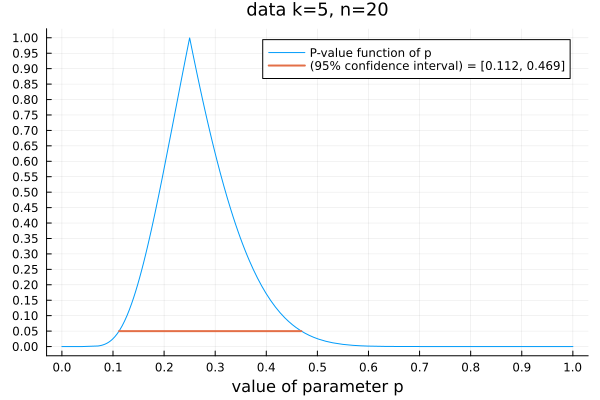

In [10]:
@show confint_score(k, n, 1-0.95);

plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function of p")
plot!(confint_score(k, n, 1-0.95), fill(0.05, 2); 
    label="(95% confidence interval) = $(round.(confint_score(k, n, 1-0.95); sigdigits=3))", c=2, lw=2)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")

### $0\%$ 信頼区間は点推定値の1点だけで構成された区間になっている

confint_score(k, n, 1 - 0) = [0.25, 0.25]


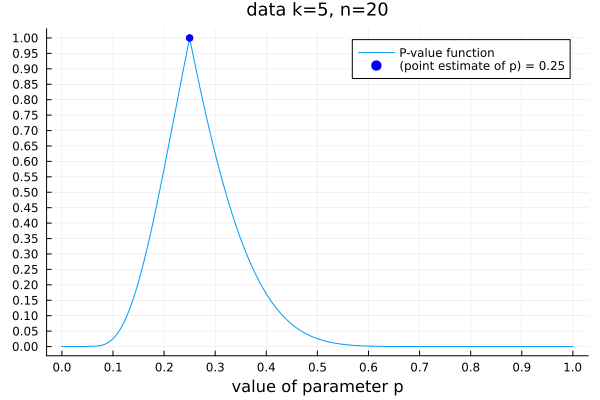

In [11]:
@show confint_score(k, n, 1-0);

plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function")
scatter!(confint_score(k, n, 1-0), fill(1, 2); ms=4, msc=:auto, 
    label="(point estimate of p) = $(confint_score(k, n, 1)[1])", c=:blue)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")

### データの数値 k=5, n=20 から得られる検定仮説 p=0.5 のP値と95%信頼区間と点推定値

pvalue_score(k, n, 0.5) = 0.025347318677468256
confint_score(k, n, 1 - 0.05) = [0.24397798229911158, 0.2561203018775318]
confint_score(k, n, 1 - 0.0) = [0.25, 0.25]


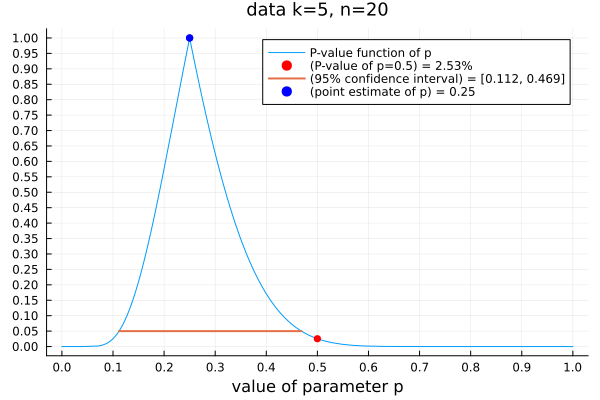

In [12]:
@show pvalue_score(k, n, 0.5);
@show confint_score(k, n, 1-0.05);
@show confint_score(k, n, 1-0.0);

plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function of p")
scatter!([0.5], [pvalue_score(k, n, 0.5)]; ms=4, msc=:auto, 
    label="(P-value of p=0.5) = $(round(100pvalue_score(k, n, 0.5); sigdigits=3))%", c=:red)
plot!(confint_score(k, n, 1-0.95), fill(0.05, 2); 
    label="(95% confidence interval) = $(round.(confint_score(k, n, 1-0.95); sigdigits=3))", c=2, lw=2)
scatter!(confint_score(k, n, 1-0), fill(1, 2); ms=4, msc=:auto, 
    label="(point estimate of p) = $(confint_score(k, n, 1)[1])", c=:blue)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")

In [13]:
posterior = Beta(1+k, 1+n-k)
pval_bayes = pvalue_bayes_hdi(k, n, 0.5)
ci_pval_bayes = credint_hdi(k, n, pval_bayes)

P = plot(posterior, 0, 1; label="posterior", c=7)
plot!(posterior, 0, first(ci_pval_bayes);
    label="(Bayesian P-value of p=0.5) = $(round(100pval_bayes; sigdigits=3))%",
    fillrange=0.0, alpha=0.3, c=:red)
plot!(posterior, last(ci_pval_bayes), 1; label="",
    fillrange=0.0, alpha=0.3, c=:red)
plot!(credint_hdi(k, n, 1-0.95), pdf.(posterior, credint_hdi(k, n, 1-0.95)); 
    label="(95% credible interval) = $(round.(credint_hdi(k, n, 1-0.95); sigdigits=3))", c=6, lw=2)
scatter!(credint_hdi(k, n, 1-0), pdf.(posterior, credint_hdi(k, n, 1-0)); ms=4, msc=:auto, 
    label="(point estimate of p) = $(confint_score(k, n, 1)[1])", c=:blue)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1)
title!("data k=$k, n=$n and flat prior")

Q = plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function")
scatter!([0.5], [pvalue_score(k, n, 0.5)]; ms=4, msc=:auto, 
    label="(P-value of p=0.5) = $(round(100pvalue_score(k, n, 0.5); sigdigits=3))%", c=:red)
plot!(confint_score(k, n, 1-0.95), fill(0.05, 2); 
    label="(95% confidence interval) = $(round.(confint_score(k, n, 1-0.95); sigdigits=3))", c=2, lw=2)
scatter!(confint_score(k, n, 1-0), fill(1, 2); ms=4, msc=:auto, 
    label="(point estimate of p) = $(confint_score(k, n, 1)[1])", c=:blue)
plot!(xguide="value of parameter p")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")
;

## 平坦事前分布のベイズ統計との比較

この場合には, 通常のP値関数(上ではスコア法のP値関数を扱ったあ)と, 平坦事前分布のベイズ統計での事後分布はほぼ同じ使い方をしてよい.

### 事後分布とP値関数はほぼ同じ使い方をできる.

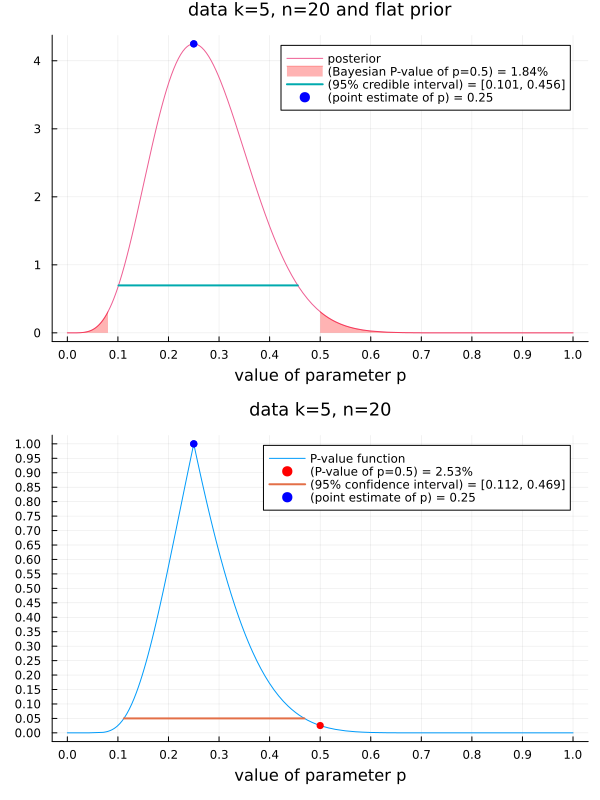

In [14]:
plot(P, Q; size=(600, 800), layout=(2, 1))
plot!(leftmargin=4Plots.mm)

### ❸すべての信用水準 $1-\alpha$ のベイズ信用区間全体を報告

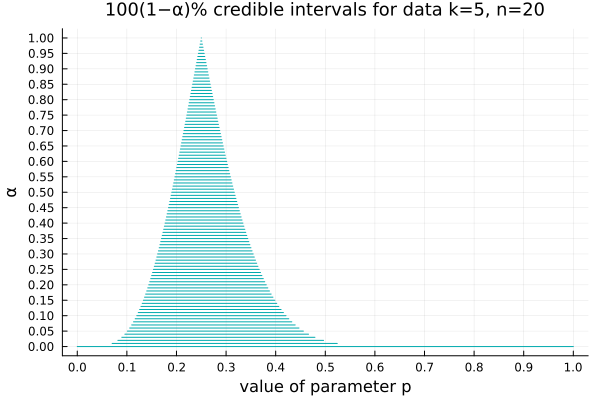

In [15]:
plot()
αs = 0:0.01:1
for α in αs
    plot!(credint_hdi(k, n, α), fill(α, 2); label="", c=6)
end
plot!(xguide="value of parameter p", yguide="α")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("100(1−α)% credible intervals for data k=$k, n=$n")

### ③と❸の同等性よりベイズ的なP値関数が得られる.

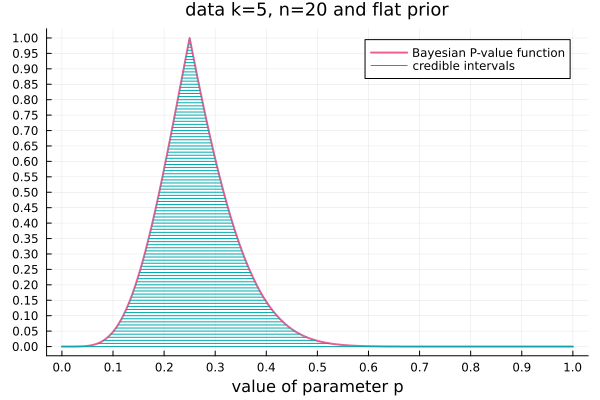

In [16]:
plot(p -> pvalue_bayes_hdi(k, n, p), 0, 1;
    label="Bayesian P-value function", lw=2, c=7)
αs = 0:0.01:1
l = true
for α in αs
    plot!(credint_hdi(k, n, α), fill(α, 2); 
        label=(l ? "credible intervals" : ""), c=6)
    l = false
end
plot!(xguide="value of parameter p", yguide="")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n and flat prior")

### スコアP値関数とベイズP値関数の比較

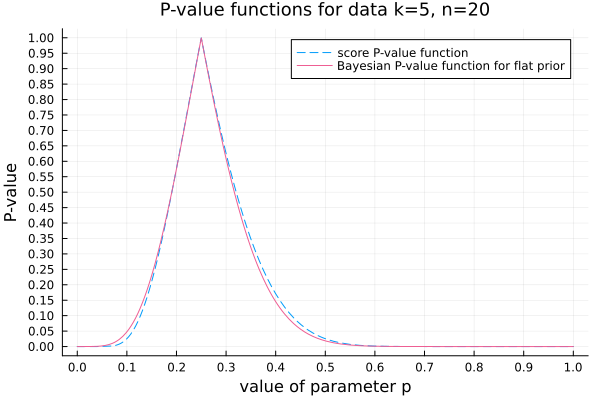

In [17]:
plot(p -> pvalue_score(k, n, p), 0, 1;
    label="score P-value function", c=1, ls=:dash)
plot!(p -> pvalue_bayes_hdi(k, n, p), 0, 1;
    label="Bayesian P-value function for flat prior", c=7, ls=:solid)
plot!(xguide="value of parameter p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for data k=$k, n=$n")

標本サイズは小さめなのに, よく一致しているように見える.

## 事前分布が偏っている場合での比較

### 偏っている事前分布

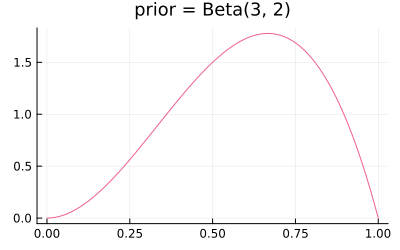

In [18]:
κ, λ = 3, 2
prior = Beta(κ, λ)
plot(prior; label="", c=7, size=(400, 250))
title!("prior = Beta($κ, $λ)")

### 標本サイズが小さい場合

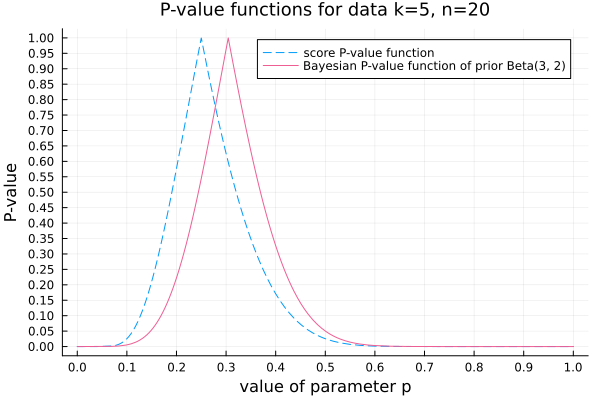

In [19]:
plot(p -> pvalue_score(k, n, p), 0, 1;
    label="score P-value function", c=1, ls=:dash)
plot!(p -> pvalue_bayes_hdi(k, n, p; prior), 0, 1;
    label="Bayesian P-value function of prior Beta($κ, $λ)",
    c=7, ls=:solid)
plot!(xguide="value of parameter p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for data k=$k, n=$n")

事前分布が偏っていてかつ, 標本サイズが小さい場合にはこのようにずれる.

### 標本サイズを大きくした場合

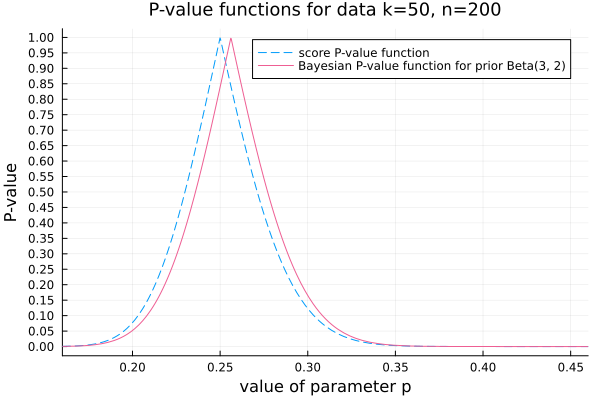

In [20]:
k, n = 50, 200
plot(p -> pvalue_score(k, n, p), 0, 1;
    label="score P-value function", c=1, ls=:dash)
plot!(p -> pvalue_bayes_hdi(k, n, p; prior), 0, 1;
    label="Bayesian P-value function for prior Beta($κ, $λ)",
    c=7, ls=:solid)
plot!(xguide="value of parameter p", yguide="P-value")
plot!(xtick=0:0.05:1, ytick=0:0.05:1)
plot!(xlim=(0.16, 0.46))
title!("P-value functions for data k=$k, n=$n")

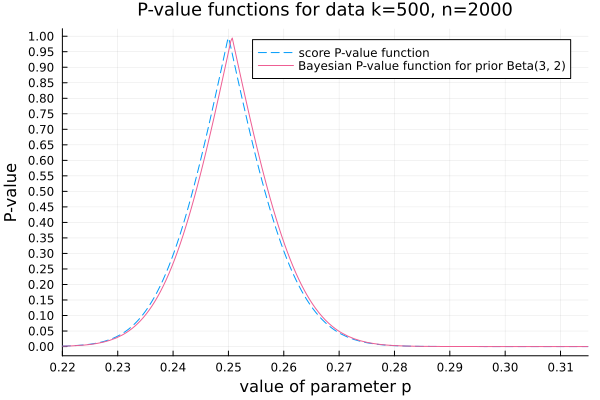

In [21]:
k, n = 500, 2000
plot(p -> pvalue_score(k, n, p), 0, 1;
    label="score P-value function", c=1, ls=:dash)
plot!(p -> pvalue_bayes_hdi(k, n, p; prior), 0, 1;
    label="Bayesian P-value function for prior Beta($κ, $λ)",
    c=7, ls=:solid)
plot!(xguide="value of parameter p", yguide="P-value")
plot!(xtick=0:0.01:1, ytick=0:0.05:1)
plot!(xlim=(0.22, 0.315))
title!("P-value functions for data k=$k, n=$n")

事前分布が偏っていても, 標本サイズを大きくして行くとその影響が消えて, 一致するようになる.